# AML Challenge

## Setup

In [276]:
# Loading libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from datetime import datetime
from prettytable import PrettyTable
from matplotlib.ticker import ScalarFormatter
from scipy.stats import linregress

In [277]:
# Loading data
account = pd.read_csv('Data/account.csv', sep = ';')
client = pd.read_csv('Data/client.csv', sep = ';')
card = pd.read_csv('Data/card.csv', sep = ';')
disp = pd.read_csv('Data/disp.csv', sep = ';')
district = pd.read_csv('Data/district.csv', sep = ';')
loan = pd.read_csv('Data/loan.csv', sep = ';')
order = pd.read_csv('Data/order.csv', sep = ';')
trans = pd.read_csv('Data/trans.csv', sep = ';')

C:\Users\chant\AppData\Local\Temp/ipykernel_16068/807387847.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv('Data/trans.csv', sep = ';')


## 1. Explorative Data Analysis
First we have a look at the different datasets. With an explorative data analysis we get a overview over the datasets and its quality. For every dataframe there is first a section of coding and at the end a brief summary with the most important findings. 

### Account
Data wrangling with the csv account. Here's a brief description from the website: 

In [278]:
print(account.head())

   account_id  district_id         frequency    date
0         576           55  POPLATEK MESICNE  930101
1        3818           74  POPLATEK MESICNE  930101
2         704           55  POPLATEK MESICNE  930101
3        2378           16  POPLATEK MESICNE  930101
4        2632           24  POPLATEK MESICNE  930102


It seems that the date column has the wrong layout, let's fix that. 

In [279]:
# Fixing the date column
account['date'] = pd.to_datetime(account['date'], format='%y%m%d')
print(account.head())

   account_id  district_id         frequency       date
0         576           55  POPLATEK MESICNE 1993-01-01
1        3818           74  POPLATEK MESICNE 1993-01-01
2         704           55  POPLATEK MESICNE 1993-01-01
3        2378           16  POPLATEK MESICNE 1993-01-01
4        2632           24  POPLATEK MESICNE 1993-01-02


In [280]:
# Translating the frequency into English
translation_frequency = {
    'POPLATEK MESICNE': 'monthly',
    'POPLATEK TYDNE': 'weekly',
    'POPLATEK PO TRANSAKCI': 'after transaction'
}

account['frequency'] = account['frequency'].map(translation_frequency)
account.head

<bound method NDFrame.head of       account_id  district_id frequency       date
0            576           55   monthly 1993-01-01
1           3818           74   monthly 1993-01-01
2            704           55   monthly 1993-01-01
3           2378           16   monthly 1993-01-01
4           2632           24   monthly 1993-01-02
...          ...          ...       ...        ...
4495         124           55   monthly 1997-12-28
4496        3958           59   monthly 1997-12-28
4497         777           30   monthly 1997-12-28
4498        1573           63   monthly 1997-12-29
4499        3276            1   monthly 1997-12-29

[4500 rows x 4 columns]>

In [281]:
print(account.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   account_id   4500 non-null   int64         
 1   district_id  4500 non-null   int64         
 2   frequency    4407 non-null   object        
 3   date         4500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 140.8+ KB
None


In [282]:
# Checking if there are any data missing
print(account.isnull().sum())

account_id      0
district_id     0
frequency      93
date            0
dtype: int64


In [283]:
# How many unique IDs of accounts are there and how many districts are there
print(account['account_id'].nunique())
print(account['district_id'].nunique())

4500
77


#### Summary EDA Account

There are 4500 unique clients in 77 districs. 

### Client

In [284]:
print(client.head)

<bound method NDFrame.head of       client_id  birth_number  district_id
0             1        706213           18
1             2        450204            1
2             3        406009            1
3             4        561201            5
4             5        605703            5
...         ...           ...          ...
5364      13955        456030            1
5365      13956        430406            1
5366      13968        680413           61
5367      13971        626019           67
5368      13998        535812           74

[5369 rows x 3 columns]>


In [285]:
# Function to calculate the birthday, gender and age from birth_number
def calculate_birthday(df):
    
    genders = []
    birthdays = []
    ages = []
    
    base_date = datetime(1999, 12, 31)
    
    for birth_number in df['birth_number']:
        birth_number_str = str(birth_number)
        
        year = int("19" + birth_number_str[:2])
        month = int(birth_number_str[2:4])
        day = int(birth_number_str[4:6])
        
        if month > 12:
            gender = "female"
            month -= 50  # minus 50 for females
        else:
            gender = "male"
        
        birth_day = datetime(year, month, day)
        age = base_date.year - birth_day.year - ((base_date.month, base_date.day) < (birth_day.month, birth_day.day))
        
        genders.append(gender)
        birthdays.append(birth_day)
        ages.append(age)
    
    df['gender'] = genders
    df['birth_day'] = birthdays
    df['age'] = ages
    
    df = df.drop(columns=['birth_number'])
    
    return df

client = calculate_birthday(client)
#client.head

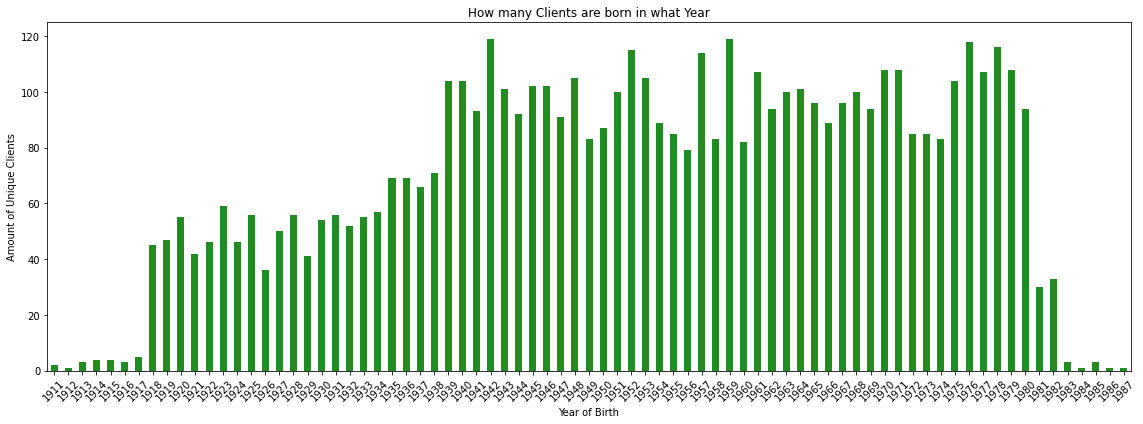

In [286]:
# Plotting the year of birth of the clients

client['birth_year'] = pd.to_datetime(client['birth_day']).dt.year
client_count_per_year = client.groupby('birth_year')['client_id'].nunique()

# Plot
plt.figure(figsize=(16, 6))
client_count_per_year.plot(kind='bar', color='forestgreen')
plt.title('How many Clients are born in what Year')
plt.xlabel('Year of Birth')
plt.ylabel('Amount of Unique Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Explanation of the plot*: The birthyear of the clients is from 1911 until 1987 and most of them are born between 1939 and 1980. Maybe it's an effect of the birthcontrol pill which became widly popular in Europe in the 1970s. 

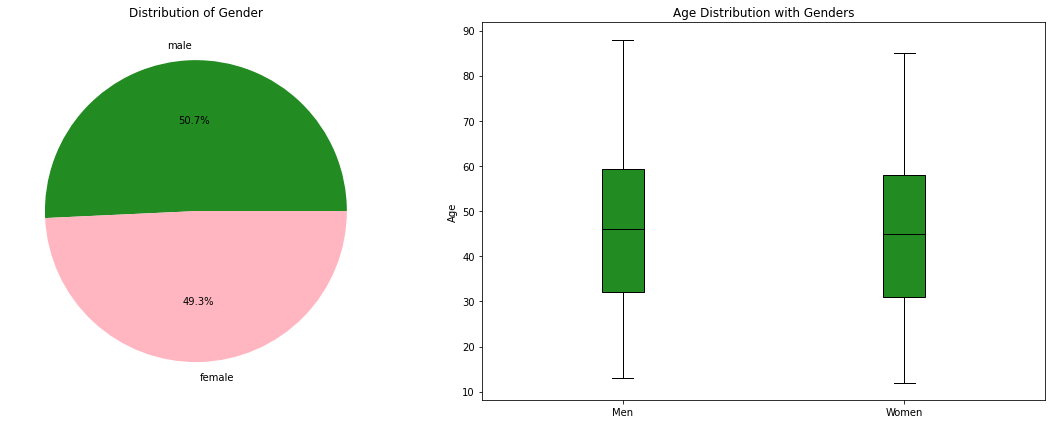

In [287]:
# Having a look at the gender distribution
colors = ['forestgreen', 'lightpink']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
gender_counts = client['gender'].value_counts()

axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Distribution of Gender')

axes[1].boxplot([client[client['gender'] == 'male']['age'], client[client['gender'] == 'female']['age']],
                labels=['Men', 'Women'], patch_artist=True,
                boxprops=dict(facecolor=colors[0]),  
                medianprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axes[1].set_ylabel('Age')
axes[1].set_title('Age Distribution with Genders')

# Plotting
plt.tight_layout()
plt.show()

*Explanation of the plot*: The distribution between genders and also age and gender seems to be equal. 

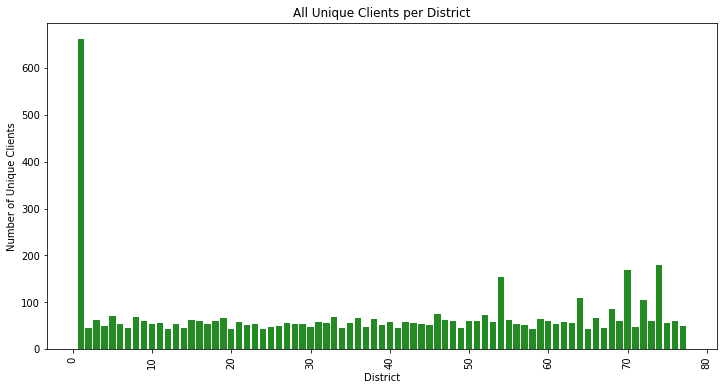

In [288]:
# Check how many unique clients are there per district in the whole dataset
data_client_district = client.merge(district, left_on='district_id', right_on='A1', how='left')
district_counts = data_client_district.groupby('A1')['client_id'].nunique().reset_index(name='unique_client_count')
district_counts = district_counts.rename(columns={'A1': 'District'})

# Plot
plt.figure(figsize=(12, 6))
plt.bar(district_counts['District'], district_counts['unique_client_count'], color='forestgreen')
plt.xlabel("District")
plt.ylabel("Number of Unique Clients")
plt.title("All Unique Clients per District")
plt.xticks(rotation=90)
plt.show()

*Explanation of the plot*: The distribution seems normal but district 1 (prague) has many clients more than the average district. Maybe it's a big city with many habitants so there are naturally more clients. 

#### Summary EDA Client
In this step we added a column for the birthday-date of the costumers and the gender of the costumers. There is a plot which shows in what year how many costumers were born. Also we can see that the gender distribution is equal. We also see that most costumers come from the district Prague which isn't surprising since it's the biggest city in Czech Republic. 

### Card

In [289]:
# Making the table readable (issued means ausgestellt)
card['issued'] = pd.to_datetime(card['issued'], format='%y%m%d %H:%M:%S', errors='coerce')

table = PrettyTable()
table.field_names = ["card_id", "disp_id", "type", "issued"]

for index, row in card.head(10).iterrows():
    table.add_row([row['card_id'], row['disp_id'], row['type'], row['issued']])

print(table)

+---------+---------+---------+---------------------+
| card_id | disp_id |   type  |        issued       |
+---------+---------+---------+---------------------+
|   1005  |   9285  | classic | 1993-11-07 00:00:00 |
|   104   |   588   | classic | 1994-01-19 00:00:00 |
|   747   |   4915  | classic | 1994-02-05 00:00:00 |
|    70   |   439   | classic | 1994-02-08 00:00:00 |
|   577   |   3687  | classic | 1994-02-15 00:00:00 |
|   377   |   2429  | classic | 1994-03-03 00:00:00 |
|   721   |   4680  |  junior | 1994-04-05 00:00:00 |
|   437   |   2762  | classic | 1994-06-01 00:00:00 |
|   188   |   1146  | classic | 1994-06-19 00:00:00 |
|    13   |    87   | classic | 1994-06-29 00:00:00 |
+---------+---------+---------+---------------------+


In [290]:
# How many card types are there?
print(card['type'].value_counts())

classic    659
junior     145
gold        88
Name: type, dtype: int64


### Summary EDA Card
There are three card types: classic (659), junior (145) and gold (88). We can see, that the classic card is the most popular option for the clients. 

### Disp

In [291]:
disp.head

<bound method NDFrame.head of       disp_id  client_id  account_id       type
0           1          1           1      OWNER
1           2          2           2      OWNER
2           3          3           2  DISPONENT
3           4          4           3      OWNER
4           5          5           3  DISPONENT
...       ...        ...         ...        ...
5364    13647      13955       11349      OWNER
5365    13648      13956       11349  DISPONENT
5366    13660      13968       11359      OWNER
5367    13663      13971       11362      OWNER
5368    13690      13998       11382      OWNER

[5369 rows x 4 columns]>

In [292]:
# Checking if one account can have more than one client

multiple_clients_per_account = disp.groupby(['account_id'])['client_id'].nunique().reset_index(name='unique_clients')
multiple_clients_per_account = multiple_clients_per_account[multiple_clients_per_account['unique_clients'] > 1]
print(multiple_clients_per_account)

# Here is a list with which accounts have an owner and a disponent

      account_id  unique_clients
1              2               2
2              3               2
7              8               2
11            12               2
12            13               2
...          ...             ...
4464       10940               2
4466       10954               2
4479       11111               2
4484       11186               2
4496       11349               2

[869 rows x 2 columns]


In [293]:
# Checking if one client has more than one account
multiple_accounts_per_client = disp.groupby('client_id')['account_id'].nunique().reset_index(name='unique_accounts')
multiple_accounts_per_client = multiple_accounts_per_client[multiple_accounts_per_client['unique_accounts'] > 1]
print(multiple_accounts_per_client)

Empty DataFrame
Columns: [client_id, unique_accounts]
Index: []


### Summary EDA Disp
Some accounts have two unique clients (with unique client IDs) so some of them have an owner and a disponent. But no client has more than one account. 

### District

In [294]:
district.head

<bound method NDFrame.head of     A1               A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0    1      Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1    2          Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2    3           Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3    4           Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4    5            Kolin  central Bohemia    95616  65  30   4   1   6   51.4   
..  ..              ...              ...      ...  ..  ..  ..  ..  ..    ...   
72  73            Opava    north Moravia   182027  17  49  12   2   7   56.4   
73  74  Ostrava - mesto    north Moravia   323870   0   0   0   1   1  100.0   
74  75           Prerov    north Moravia   138032  67  30   4   2   5   64.6   
75  76          Sumperk    north Moravia   127369  31  32  13   2   7   51.2   
76  77           Vsetin    north Moravia   148545   8  35  12   3   4   53.5   

      A11

In [295]:
# Renaming the columns
new_column_names = ['district_id', 'district_name', 'region', 'inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
                    'average_salary','unemployment_rate_95', 'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

district.columns = new_column_names

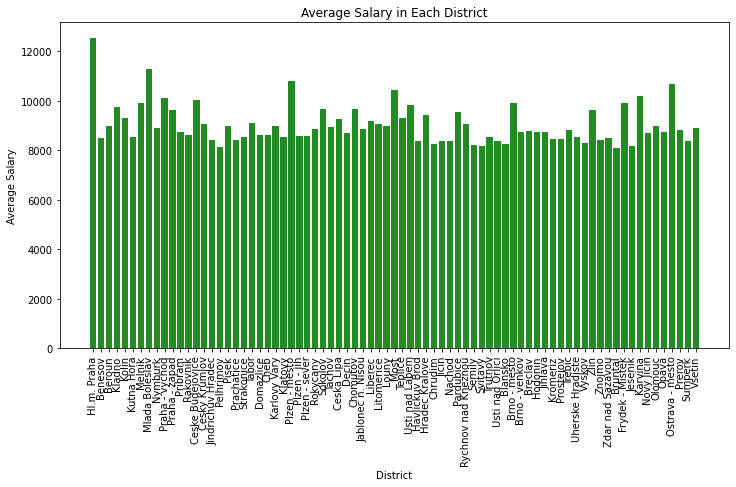

In [296]:
# What is the average salary in each district
plt.figure(figsize=(12, 6))
plt.bar(district['district_name'], district['average_salary'], color='forestgreen')
plt.xlabel("District")
plt.ylabel("Average Salary")
plt.title("Average Salary in Each District")
plt.xticks(rotation=90)
plt.show()

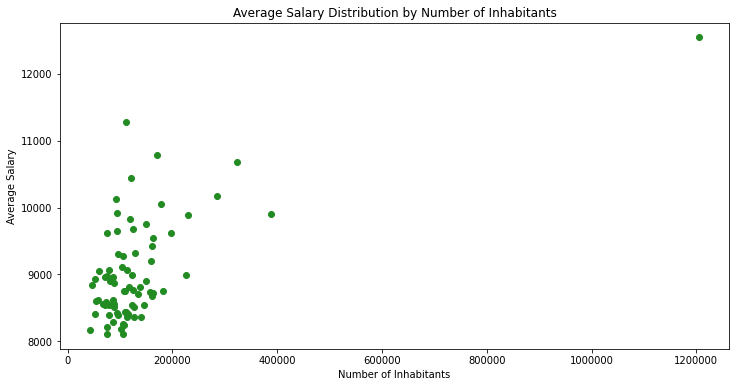

In [297]:
# Average salary depending for every district depending on the amount of inhabitants
plt.figure(figsize=(12, 6))
plt.scatter(district['inhabitants'], district['average_salary'], color='forestgreen')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants")
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x')  # Stellt sicher, dass Zahlen als ganze Werte dargestellt werden
plt.show()

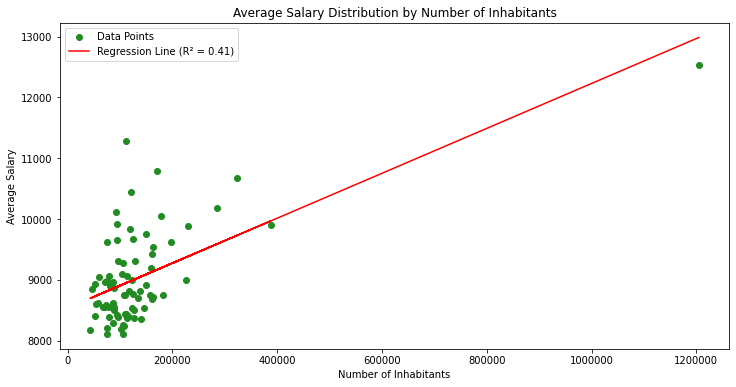

In [298]:
# The same plot but with a regression line
x = district['inhabitants']
y = district['average_salary']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='forestgreen', label='Data Points')
plt.plot(x, regression_line, color='red', label=f'Regression Line (R² = {r_value**2:.2f})')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants")
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

In [299]:
# Stats
median_salary = np.median(y)
average_salary = np.mean(y)
min_salary = np.min(y)
max_salary = np.max(y)

print("Statistics for Average Salary:")
print(f"Median Salary: {median_salary:.2f}")
print(f"Average Salary: {average_salary:.2f}")
print(f"Minimum Salary: {min_salary:.2f}")
print(f"Maximum Salary: {max_salary:.2f}")
print(f"R² (Coefficient of Determination): {r_value**2:.2f}")

Statistics for Average Salary:
Median Salary: 8814.00
Average Salary: 9031.68
Minimum Salary: 8110.00
Maximum Salary: 12541.00
R² (Coefficient of Determination): 0.41


That one dot might be an outliner. So let's check if there are more outliners and see if the R2 improves if we ignore them. 

In [300]:
# Identifying outliners
data = district['average_salary']

Q1 = np.percentile(data, 25)  
Q3 = np.percentile(data, 75)  
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
0     12541
7     11277
25    10787
73    10673
Name: average_salary, dtype: int64


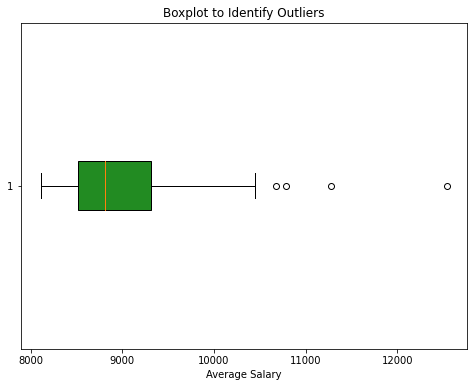

In [301]:
# Boxplot to identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='forestgreen', color='black'))
plt.title("Boxplot to Identify Outliers")
plt.xlabel("Average Salary")
plt.show()

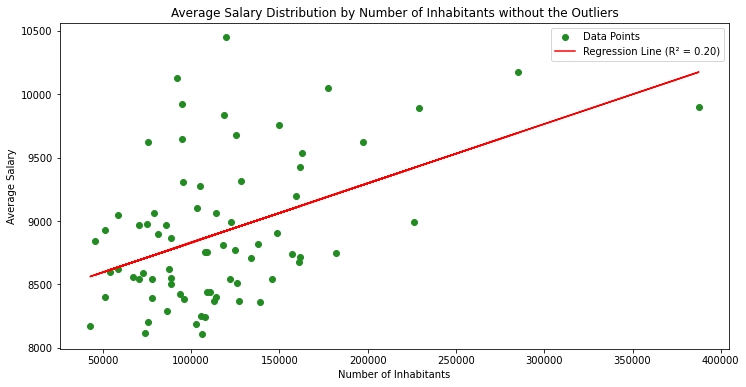

R²: 0.20


In [302]:
# Plot without the outliners
data = district['average_salary']
inhabitants = district['inhabitants']

Q1 = np.percentile(data, 25)  
Q3 = np.percentile(data, 75) 
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = district[(data >= lower_bound) & (data <= upper_bound)]

x = filtered_data['inhabitants']
y = filtered_data['average_salary']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='forestgreen', label='Data Points')
plt.plot(x, regression_line, color='red', label=f'Regression Line (R² = {r_value**2:.2f})')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants without the Outliers")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()
print(f"R²: {r_value**2:.2f}")

Hm, the R**2 got worse. Let's analyse the outliners. 

In [303]:
outliers = district[(data < lower_bound) | (data > upper_bound)]
print(outliers)

    district_id    district_name           region  inhabitants  \
0             1      Hl.m. Praha           Prague      1204953   
7             8   Mlada Boleslav  central Bohemia       112065   
25           26    Plzen - mesto     west Bohemia       170449   
73           74  Ostrava - mesto    north Moravia       323870   

    villages_less_499  villages_500_to_1999  villages_2000_to_9999  \
0                   0                     0                      0   
7                  95                    19                      7   
25                  0                     0                      0   
73                  0                     0                      0   

    villages_with_more_10000  number_of_cities  ratio_urban_inhabitants  \
0                          1                 1                    100.0   
7                          1                 8                     69.4   
25                         1                 1                    100.0   
73                

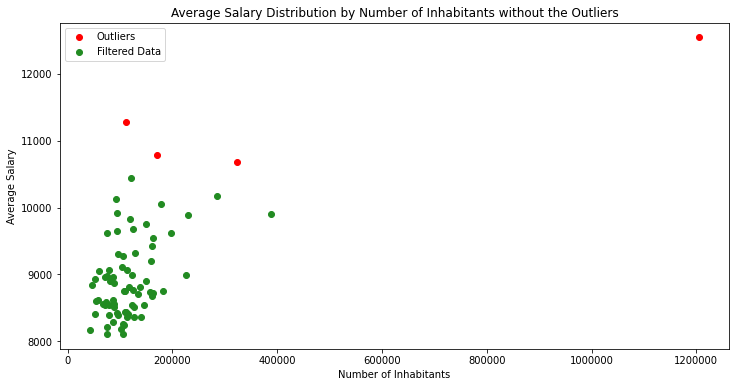

In [304]:
# Marking the outliners
plt.figure(figsize=(12, 6))
plt.scatter(outliers['inhabitants'], outliers['average_salary'], color='red', label='Outliers')
plt.scatter(filtered_data['inhabitants'], filtered_data['average_salary'], color='forestgreen', label='Filtered Data')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants without the Outliers")
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='x')  # Ensures plain formatting for x-axis

plt.legend()
plt.show()

Mean of Residuals: -0.00
Standard Deviation of Residuals: 502.49


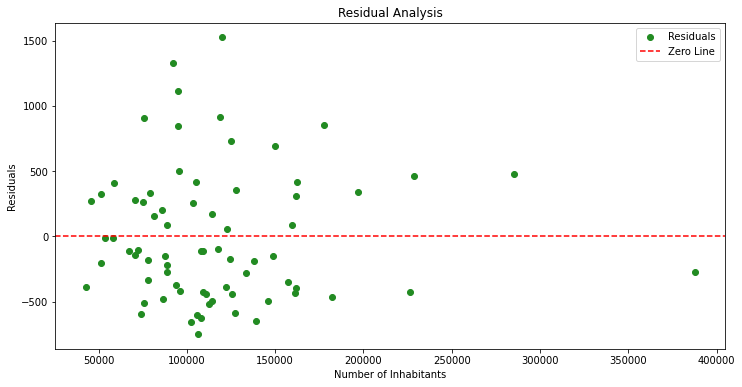

In [305]:
# Calculating the residuals
x = filtered_data['inhabitants']
y = filtered_data['average_salary']

slope, intercept, _, _, _ = linregress(x, y)
y_pred = slope * x + intercept  
residuals = y - y_pred

print(f"Mean of Residuals: {np.mean(residuals):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.2f}")

plt.figure(figsize=(12, 6))
plt.scatter(x, residuals, color='forestgreen', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line') 
plt.xlabel("Number of Inhabitants")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.legend()
plt.show()

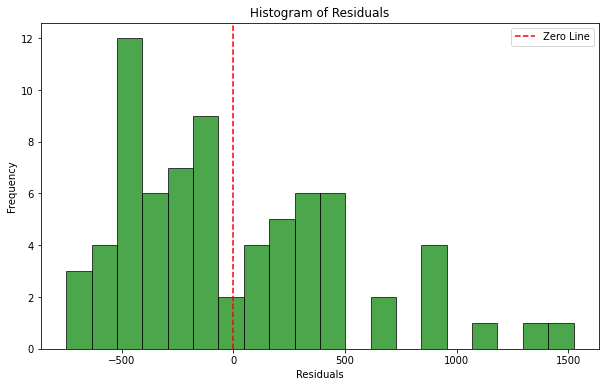

In [306]:
# Histogram for the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.legend()
plt.show()

Conclusion: There might be some outliners, so we need to be aware of that when we train a model. 

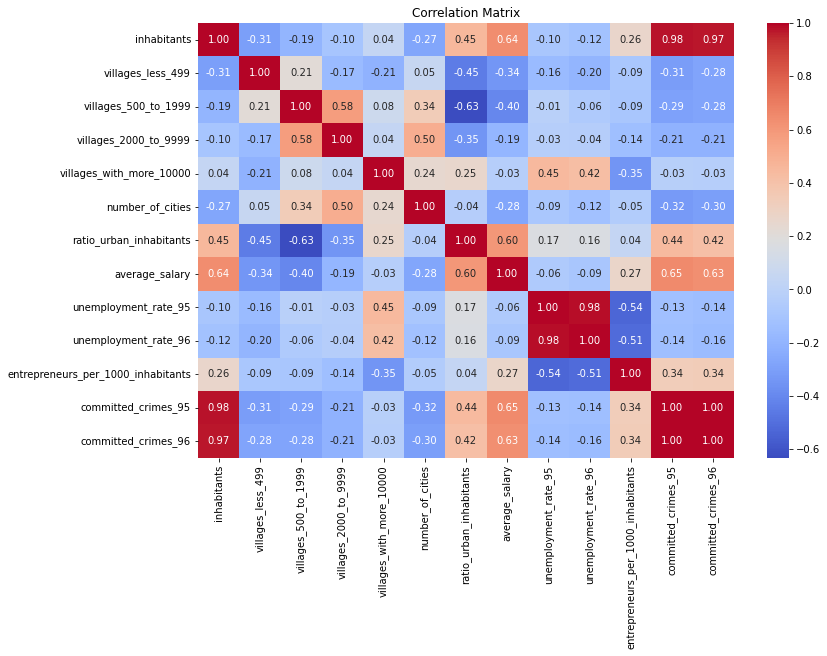

In [307]:
# Correlation matrix
numeric_columns = ['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 
                   'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
                   'average_salary', 'unemployment_rate_95', 'unemployment_rate_96', 
                   'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

district[numeric_columns] = district[numeric_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 8))
correlation_matrix = district[['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
                    'average_salary','unemployment_rate_95', 'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\chant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated i

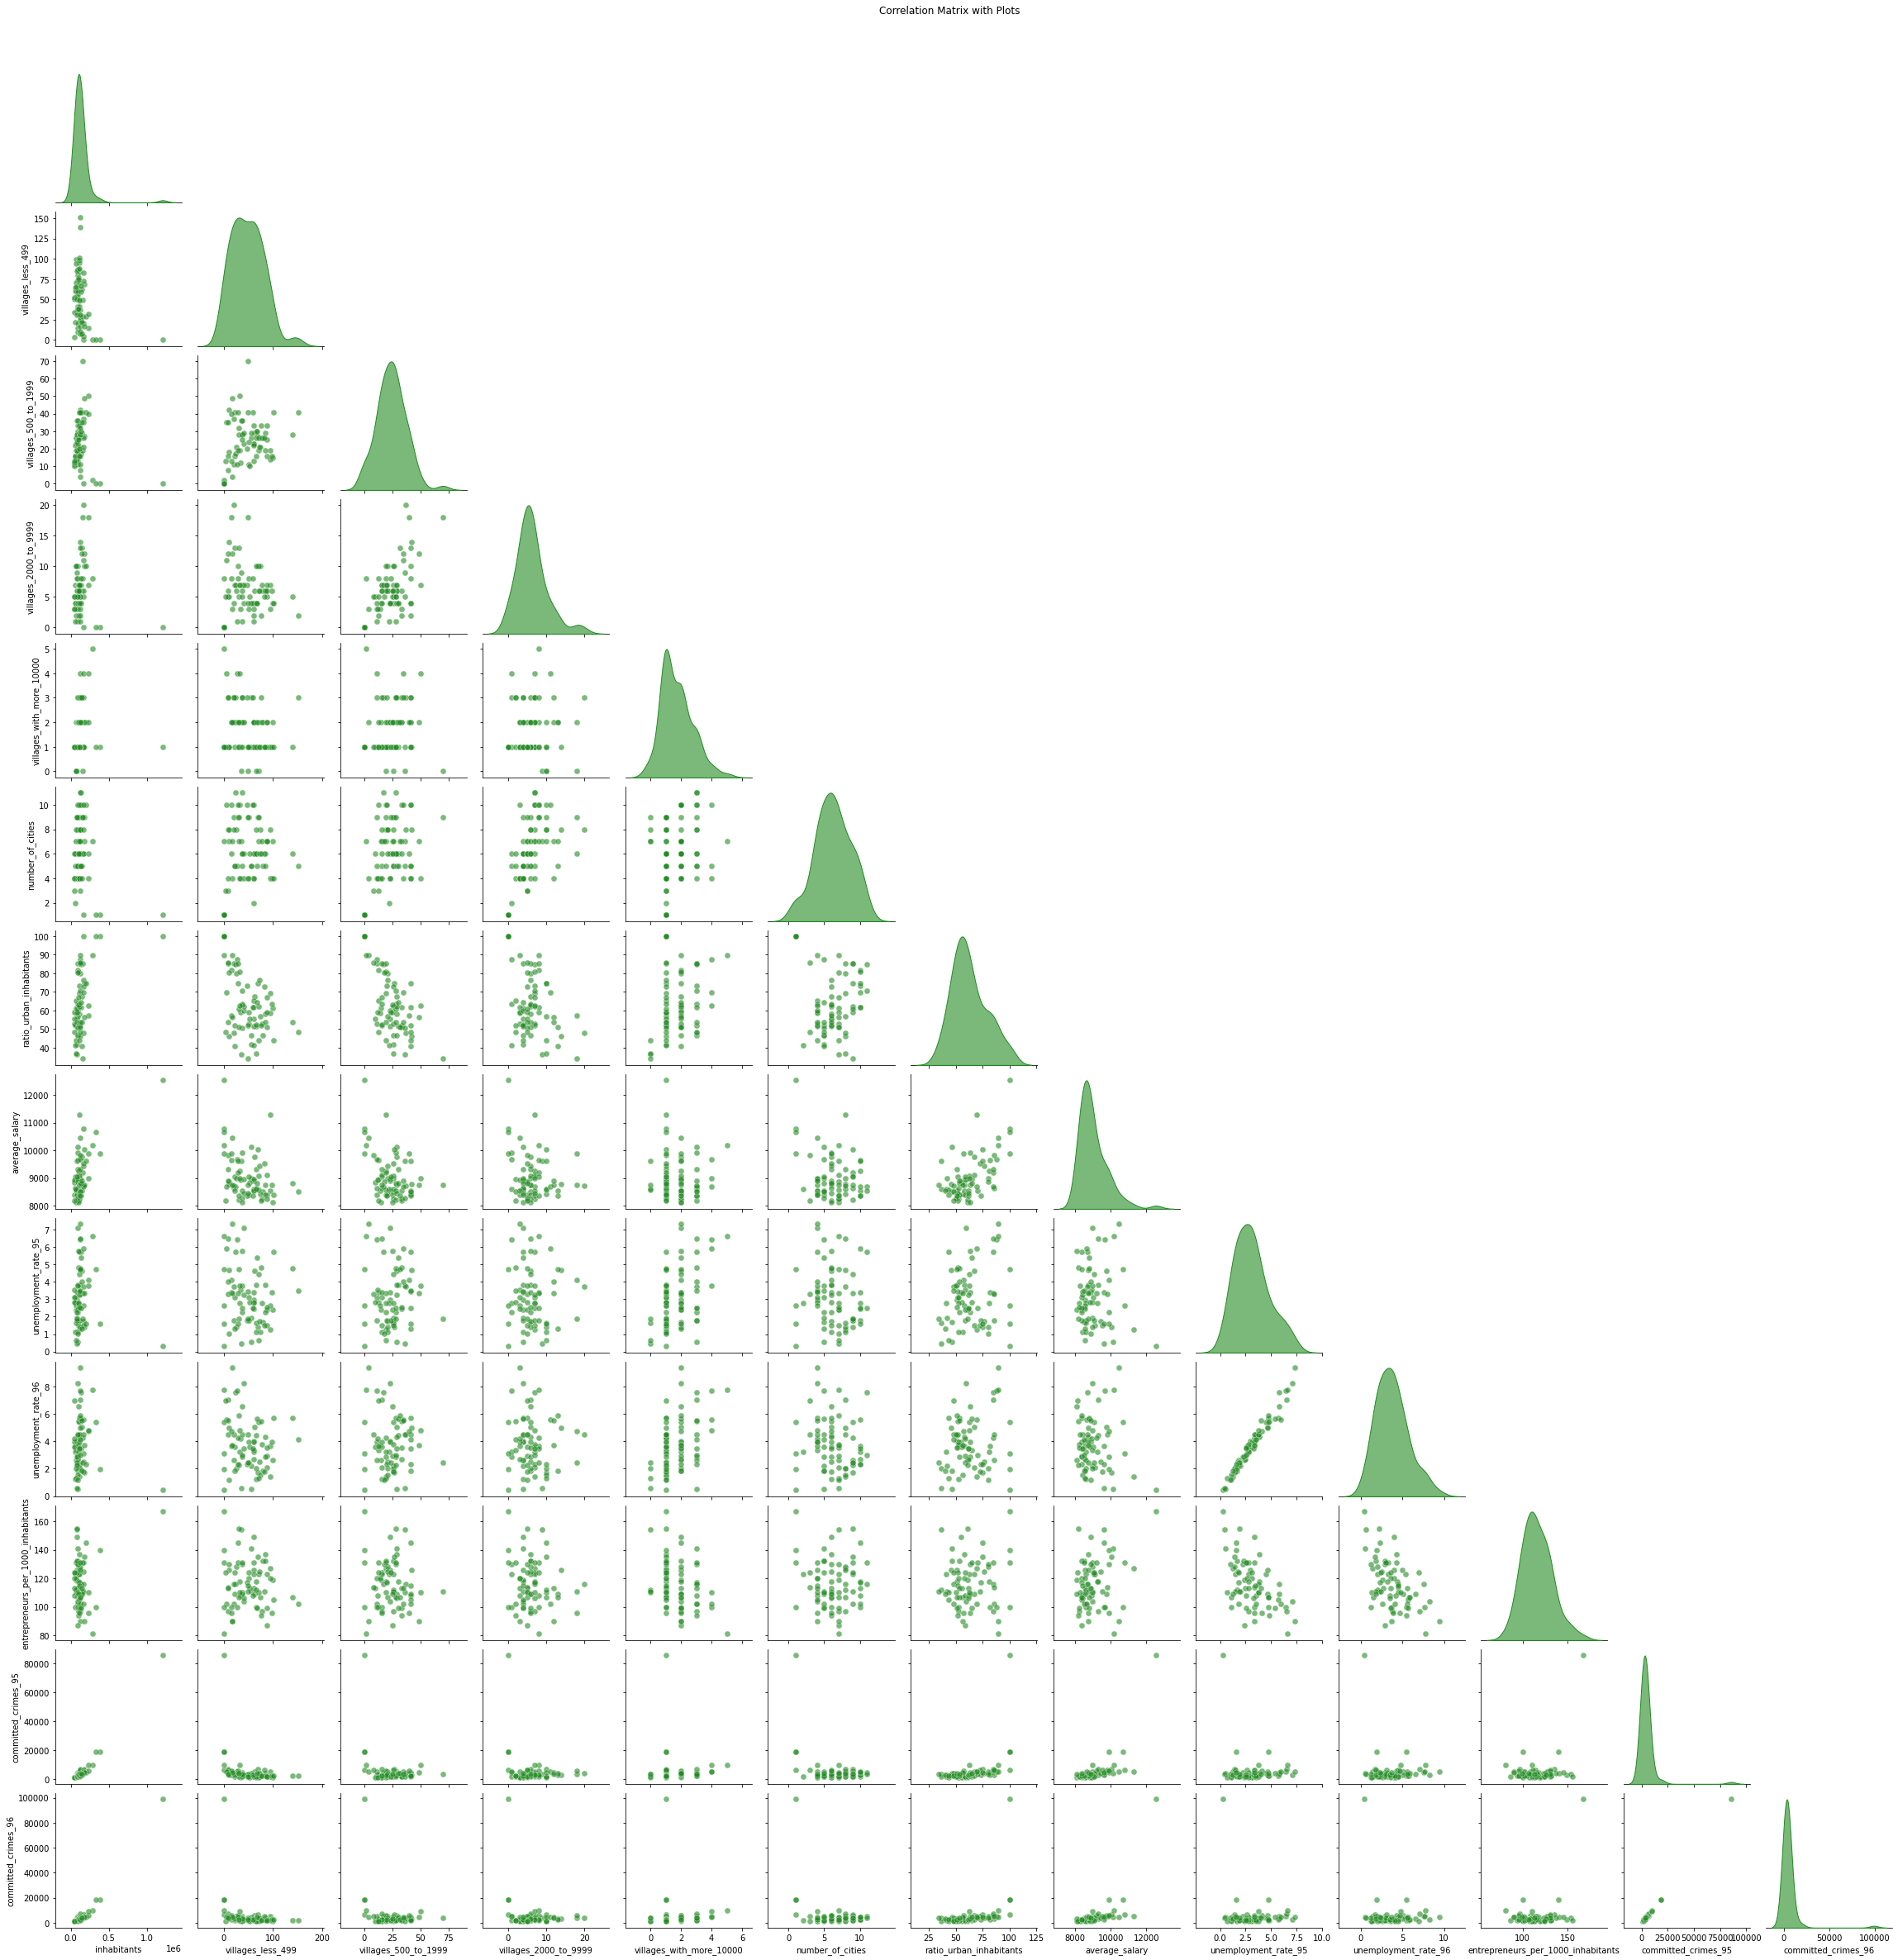

In [308]:
# Different correlation matrix
columns = ['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 
           'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
           'average_salary', 'unemployment_rate_95', 'unemployment_rate_96', 
           'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

# Plot
sns.pairplot(district[columns], diag_kind='kde', corner=True,
             plot_kws={'alpha': 0.6, 's': 50, 'color': 'forestgreen'},  
             diag_kws={'shade': True, 'alpha': 0.6, 'color': 'forestgreen'}) 
plt.suptitle("Correlation Matrix with Plots", y=1.02)  
plt.show()

### Summary EDA District
This dataframe contains information about the districts. Czechia only has four regions similar to the four regions of Switzerland (Romandie, Deutschschweiz, etc.). 

### Loan

In [309]:
loan.head

<bound method NDFrame.head of      loan_id  account_id    date  amount  duration  payments status
0       5314        1787  930705   96396        12    8033.0      B
1       5316        1801  930711  165960        36    4610.0      A
2       6863        9188  930728  127080        60    2118.0      A
3       5325        1843  930803  105804        36    2939.0      A
4       7240       11013  930906  274740        60    4579.0      A
..       ...         ...     ...     ...       ...       ...    ...
677     4989         105  981205  352704        48    7348.0      C
678     5221        1284  981205   52512        12    4376.0      C
679     6402        6922  981206  139488        24    5812.0      C
680     5346        1928  981206   55632        24    2318.0      C
681     6748        8645  981208  240900        60    4015.0      C

[682 rows x 7 columns]>

In [310]:
# Changing payment status into words
status_mapping = {
    'A': 'contract finished, no problems',
    'B': 'contract finished, loan not payed',
    'C': 'running contract, OK so far',
    'D': 'running contract, client in debt'
}

# Anwenden des Mappings auf die Spalte 'status'
loan['status'] = loan['status'].map(status_mapping)
loan.head

<bound method NDFrame.head of      loan_id  account_id    date  amount  duration  payments  \
0       5314        1787  930705   96396        12    8033.0   
1       5316        1801  930711  165960        36    4610.0   
2       6863        9188  930728  127080        60    2118.0   
3       5325        1843  930803  105804        36    2939.0   
4       7240       11013  930906  274740        60    4579.0   
..       ...         ...     ...     ...       ...       ...   
677     4989         105  981205  352704        48    7348.0   
678     5221        1284  981205   52512        12    4376.0   
679     6402        6922  981206  139488        24    5812.0   
680     5346        1928  981206   55632        24    2318.0   
681     6748        8645  981208  240900        60    4015.0   

                                status  
0    contract finished, loan not payed  
1       contract finished, no problems  
2       contract finished, no problems  
3       contract finished, no problem

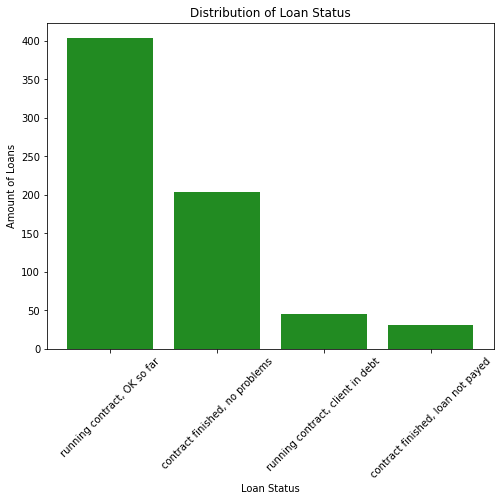

In [311]:
# Checking which status occurs the most
status_counts = loan['status'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(status_counts.index, status_counts.values, color="forestgreen")
plt.xlabel('Loan Status')
plt.ylabel('Amount of Loans')
plt.title('Distribution of Loan Status')
plt.xticks(rotation=45)
plt.show()

In [312]:
# Changing the column date into datetime format
loan['date'] = pd.to_datetime(loan['date'], format='%y%m%d')
loan

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033.0,"contract finished, loan not payed"
1,5316,1801,1993-07-11,165960,36,4610.0,"contract finished, no problems"
2,6863,9188,1993-07-28,127080,60,2118.0,"contract finished, no problems"
3,5325,1843,1993-08-03,105804,36,2939.0,"contract finished, no problems"
4,7240,11013,1993-09-06,274740,60,4579.0,"contract finished, no problems"
...,...,...,...,...,...,...,...
677,4989,105,1998-12-05,352704,48,7348.0,"running contract, OK so far"
678,5221,1284,1998-12-05,52512,12,4376.0,"running contract, OK so far"
679,6402,6922,1998-12-06,139488,24,5812.0,"running contract, OK so far"
680,5346,1928,1998-12-06,55632,24,2318.0,"running contract, OK so far"


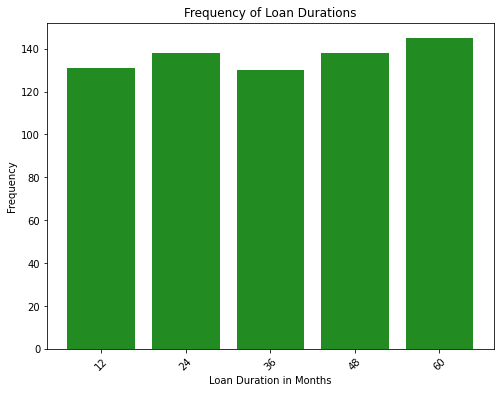

In [313]:
# How popular is which duration of the loan?
duration_counts_sorted = loan['duration'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(duration_counts_sorted.index.astype(str), duration_counts_sorted.values, color="forestgreen")
plt.xlabel('Loan Duration in Months')
plt.ylabel('Frequency')
plt.title('Frequency of Loan Durations')
plt.xticks(rotation=45)
plt.show()

In [314]:
loan['duration'].describe()

count    682.000000
mean      36.492669
std       17.075219
min       12.000000
25%       24.000000
50%       36.000000
75%       48.000000
max       60.000000
Name: duration, dtype: float64

In [315]:
# Can one account have more than one loan?
account_loan_counts = loan['account_id'].value_counts()
print(account_loan_counts[account_loan_counts > 1])

Series([], Name: account_id, dtype: int64)


#### Summary EDA Loan
Every loan has an unique ID which is connected so the account_id. The loans are also categorised and the duration is in months. The minimal duration is 12 months and the maximum duration is 60 months. There is no account with more than one loan. 

### Order

In [316]:
# Overview
order

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,SIPO
6467,46335,11362,MN,78507822,56.0,
6468,46336,11362,ST,40799850,330.0,POJISTNE
6469,46337,11362,KL,20009470,129.0,


In [317]:
# Changing the k_symbol to English
order.rename(columns={'k_symbol': 'payment_type'}, inplace=True)
payment_type_mapping = {
    'POJISTNE': 'insurance payment',
    'SIPO': 'household',
    'LEASING': 'leasing',
    'UVER': 'loan payment'
}
order['payment_type'] = order['payment_type'].map(payment_type_mapping)
order

,order_id,account_id,bank_to,account_to,amount,payment_type
0,29401,1,YZ,87144583,2452.0,household
1,29402,2,ST,89597016,3372.7,loan payment
2,29403,2,QR,13943797,7266.0,household
3,29404,3,WX,83084338,1135.0,household
4,29405,3,CD,24485939,327.0,NaN
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,household
6467,46335,11362,MN,78507822,56.0,NaN
6468,46336,11362,ST,40799850,330.0,insurance payment
6469,46337,11362,KL,20009470,129.0,NaN


#### Summary EDA Order

### Transactions

In [318]:
# Overview 
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN


In [319]:
# Fixing the column date into date format
trans['date'] = pd.to_datetime(trans['date'], format='%y%m%d')
print(trans.head())

   trans_id  account_id       date    type operation  amount  balance  \
0    695247        2378 1993-01-01  PRIJEM     VKLAD   700.0    700.0   
1    171812         576 1993-01-01  PRIJEM     VKLAD   900.0    900.0   
2    207264         704 1993-01-01  PRIJEM     VKLAD  1000.0   1000.0   
3   1117247        3818 1993-01-01  PRIJEM     VKLAD   600.0    600.0   
4    579373        1972 1993-01-02  PRIJEM     VKLAD   400.0    400.0   

  k_symbol bank  account  
0      NaN  NaN      NaN  
1      NaN  NaN      NaN  
2      NaN  NaN      NaN  
3      NaN  NaN      NaN  
4      NaN  NaN      NaN  


In [320]:
# Renaming column operation into English
translations = {
    "VYBER KARTOU": "credit_card_withdrawal",
    "VKLAD": "credit_in_cash",
    "PREVOD Z UCTU": "collection_from_other_bank",
    "VYBER": "withdrawal_cash",
    "PREVOD NA UCET": "remittance_to_other_bank"
}

trans['operation'] = trans['operation'].map(translations)
#print(trans.head())

In [321]:
# Renaming column type into English
translations = {
    "PRIJEM": "credit",
    "VYDAJ": "withdrawal"
}

trans['type'] = trans['type'].map(translations)
#print(trans.head())

In [322]:
# Renaming column k-symbol into English. Service is defined as hairdresser or other services. Sanction interest is only if the balance is negative.
translations = {
    "POJISTNE": "insurrance_payment",
    "SLUZBY": "service", 
    "UROK":"interest_credited",
    "SANKC. UROK": "sanction_interest",
    "SIPO": "household",
    "DUCHOD": "pension",
    "UVER": "loan_payment"
}

trans['k_symbol'] = trans['k_symbol'].map(translations)
#print(trans.head)

In [323]:
# Renaming k-symbol into transaction_type
trans = trans.rename(columns={'k_symbol': 'transaction_type'})

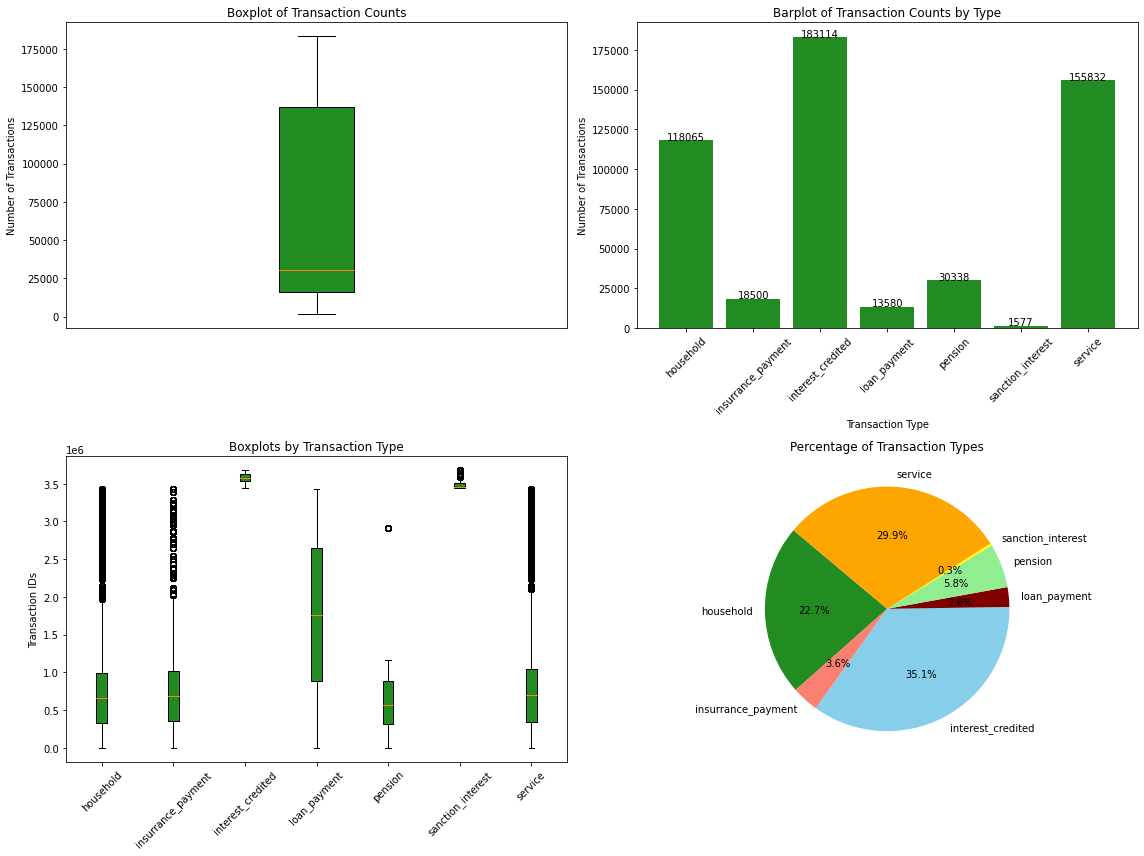

In [324]:
# How many transactions do the clients have in average?
transaction_counts = trans.groupby('transaction_type')['trans_id'].count().reset_index(name='transaction_count')

# Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='white')
axes[0, 0].boxplot(transaction_counts['transaction_count'], patch_artist=True, boxprops=dict(facecolor='forestgreen', color='black'))
axes[0, 0].set_title("Boxplot of Transaction Counts")
axes[0, 0].set_ylabel("Number of Transactions")
axes[0, 0].set_xticks([])  # Entfernt die x-Achsenbeschriftung im Boxplot
bars = axes[0, 1].bar(transaction_counts['transaction_type'], transaction_counts['transaction_count'], color='forestgreen')
axes[0, 1].set_title("Barplot of Transaction Counts by Type")
axes[0, 1].set_xlabel("Transaction Type")
axes[0, 1].set_ylabel("Number of Transactions")
axes[0, 1].tick_params(axis='x', rotation=45)  # Rotiert die x-Achsenbeschriftungen, falls nötig

for bar in bars:
    axes[0, 1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                    str(bar.get_height()), ha='center', fontsize=10)
for idx, transaction_type in enumerate(transaction_counts['transaction_type']):
    subset = trans[trans['transaction_type'] == transaction_type]
    axes[1, 0].boxplot(subset['trans_id'], positions=[idx], patch_artist=True, 
                        boxprops=dict(facecolor='forestgreen', color='black'))
axes[1, 0].set_title("Boxplots by Transaction Type")
axes[1, 0].set_xticks(range(len(transaction_counts['transaction_type'])))
axes[1, 0].set_xticklabels(transaction_counts['transaction_type'], rotation=45)
axes[1, 0].set_ylabel("Transaction IDs")
axes[1, 1].pie(
    transaction_counts['transaction_count'],
    labels=transaction_counts['transaction_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['forestgreen', 'salmon', 'skyblue', 'maroon', 'lightgreen', 'yellow', 'orange'] * len(transaction_counts)
)
axes[1, 1].set_title("Percentage of Transaction Types")

plt.tight_layout()
plt.show()

### More analysis with combined datasets

In [325]:
# What region do the card types come from?
card_disp = card.merge(disp, on='disp_id', how='inner')
card_client = card_disp.merge(client, on='client_id', how='inner')
card_client_district_disp = card_client.merge(district, on='district_id', how='inner')
print(card_client_district_disp.head())

   card_id  disp_id   type_x     issued  client_id  account_id type_y  \
0     1005     9285  classic 1993-11-07       9593        7753  OWNER   
1      314     1999   junior 1995-01-27       1999        1649  OWNER   
2      166      999  classic 1995-03-05        999         830  OWNER   
3       15      114  classic 1995-03-05        114          96  OWNER   
4      890     7422  classic 1996-09-08       7422        6148  OWNER   

   district_id  gender  birth_day  ...  villages_2000_to_9999  \
0           74  female 1968-01-28  ...                      0   
1           74  female 1982-02-10  ...                      0   
2           74  female 1966-09-01  ...                      0   
3           74  female 1969-06-24  ...                      0   
4           74    male 1958-11-26  ...                      0   

   villages_with_more_10000 number_of_cities ratio_urban_inhabitants  \
0                         1                1                   100.0   
1                         

In [326]:
# Renaming the columns type_x and type_y 
card_client_district_disp = card_client_district_disp.rename(columns={
    'type_x': 'card_type',
    'type_y': 'disp_type'
})

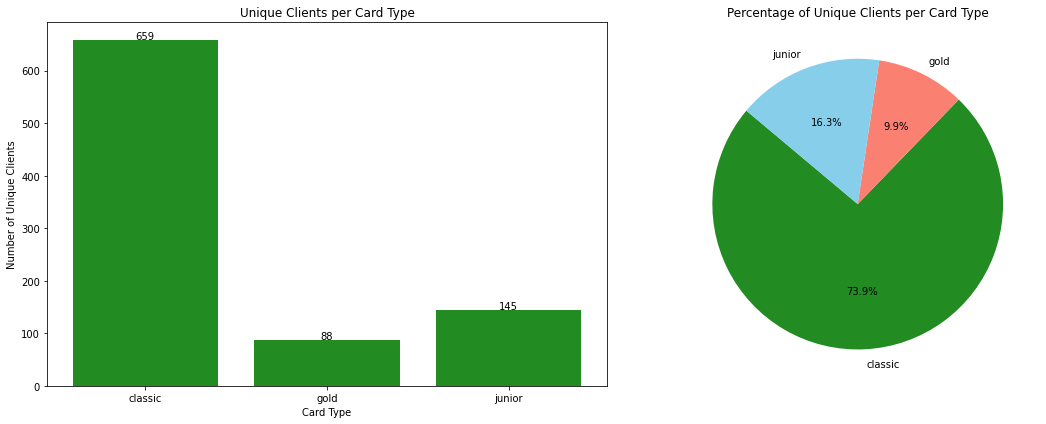

In [327]:
# How many clients use which card type?
unique_clients_per_type = card_client_district_disp.groupby('card_type')['client_id'].nunique().reset_index(name='unique_clients')
fig, axes = plt.subplots(1, 2, figsize=(16, 6), facecolor='white')

# Plots
axes[0].bar(unique_clients_per_type['card_type'], unique_clients_per_type['unique_clients'], color='forestgreen')
axes[0].set_xlabel("Card Type")
axes[0].set_ylabel("Number of Unique Clients")
axes[0].set_title("Unique Clients per Card Type")
for idx, bar in enumerate(axes[0].patches):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 str(unique_clients_per_type['unique_clients'][idx]), ha='center', fontsize=10)

axes[1].pie(
    unique_clients_per_type['unique_clients'],
    labels=unique_clients_per_type['card_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['forestgreen', 'salmon', 'skyblue'] * len(unique_clients_per_type)
)
axes[1].set_title("Percentage of Unique Clients per Card Type")

plt.tight_layout()
plt.show()

Note: Most of the clients don't have any credit card yet. 

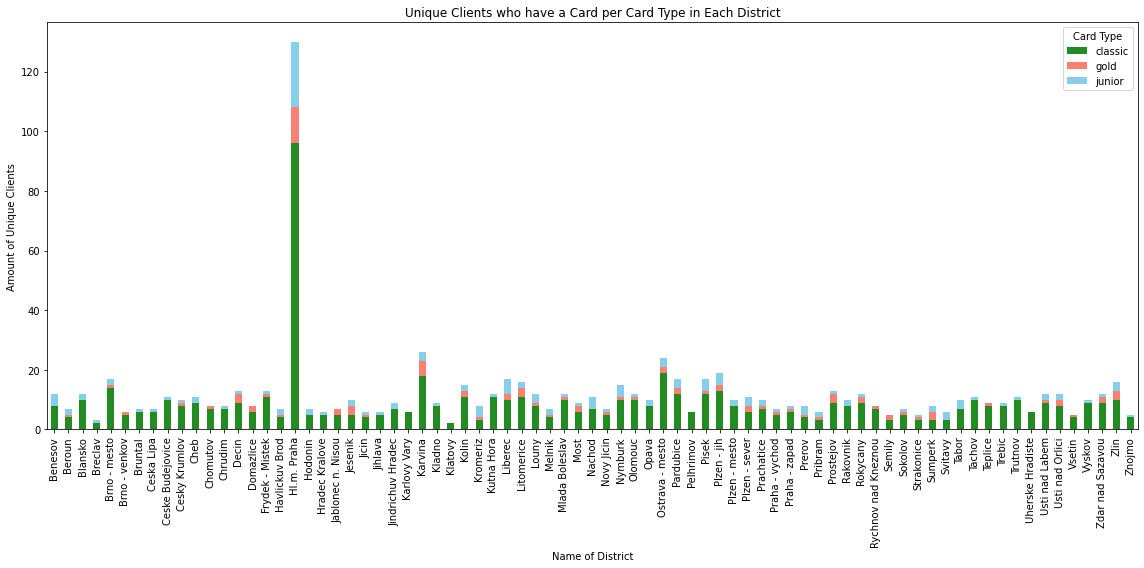

In [328]:
# How many clients have which card type in what district?
grouped_data = (
    card_client_district_disp.groupby(['district_name', 'card_type'])['client_id']
    .nunique()
    .reset_index(name='unique_clients')
)

pivot_data = grouped_data.pivot(index='district_name', columns='card_type', values='unique_clients').fillna(0)

# Barplot 
pivot_data.plot(kind='bar', stacked=True, figsize=(16, 8), color=['forestgreen', 'salmon', 'skyblue'])
plt.xlabel("Name of District")
plt.ylabel("Amount of Unique Clients")
plt.title("Unique Clients who have a Card per Card Type in Each District")
plt.xticks(rotation=90)
plt.legend(title="Card Type")
plt.tight_layout()
plt.show()

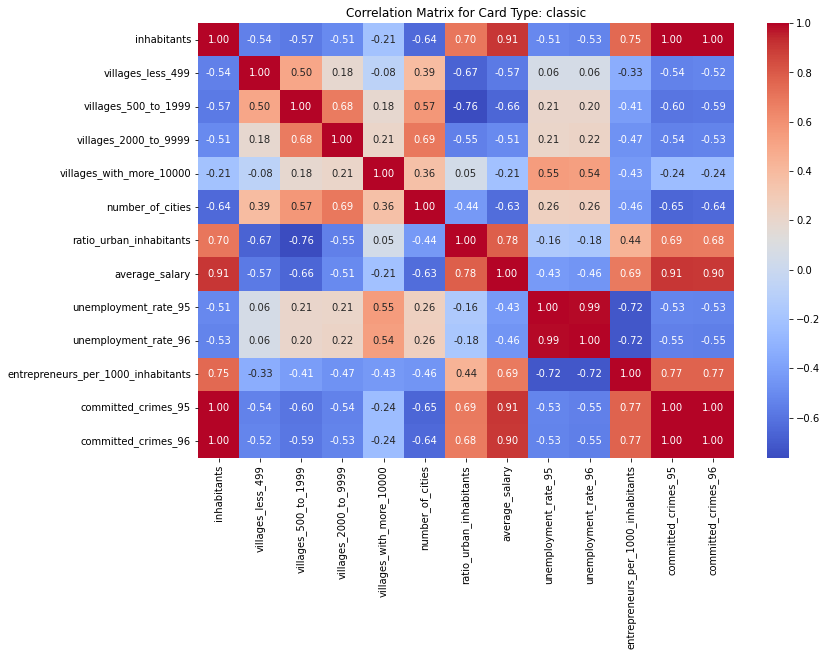

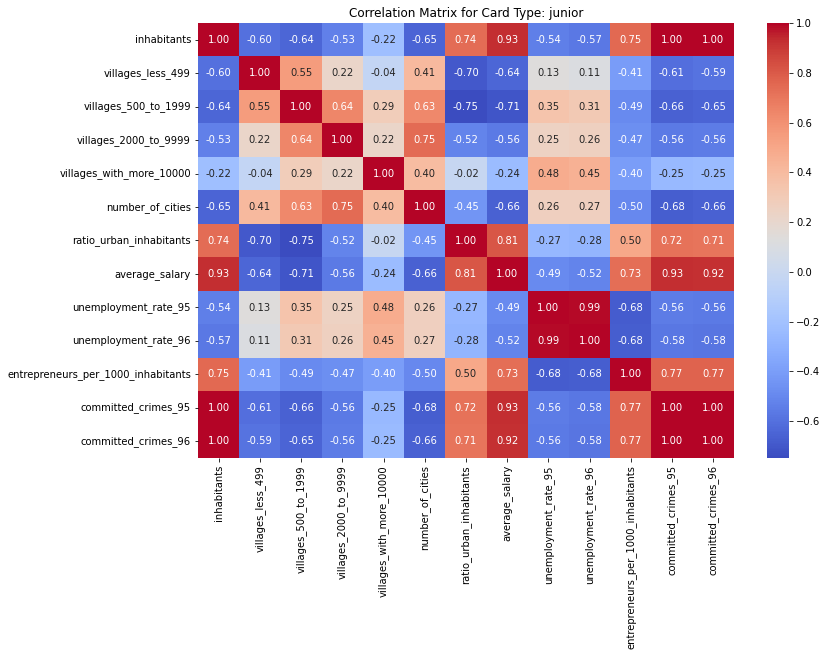

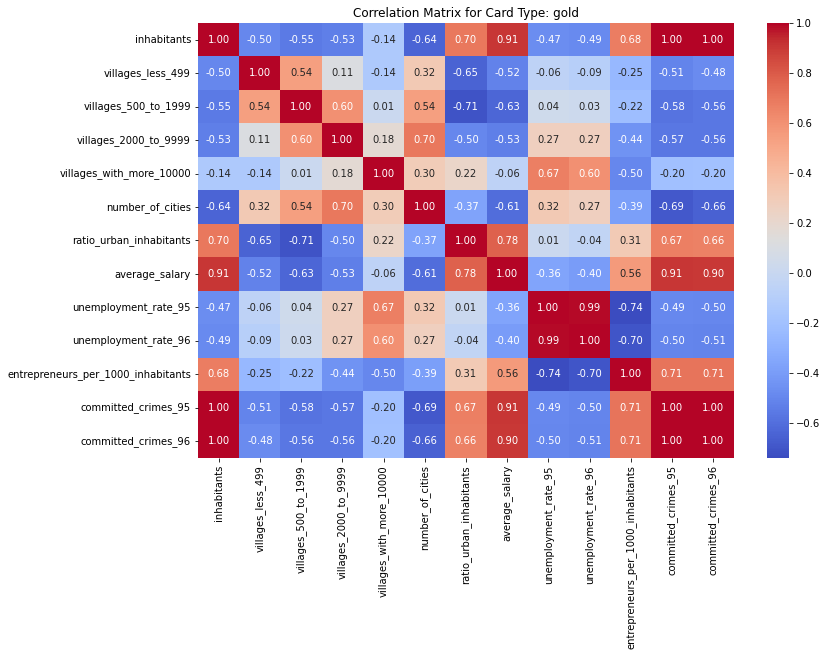

In [329]:
# In each card type: What is the correlation?
columns = ['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 
           'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
           'average_salary', 'unemployment_rate_95', 'unemployment_rate_96', 
           'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

for card_type in card_client_district_disp['card_type'].unique():
    subset = card_client_district_disp[card_client_district_disp['card_type'] == card_type]
    correlation_matrix = subset[columns].corr()
    
    # Plot 
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for Card Type: {card_type}")
    plt.show()

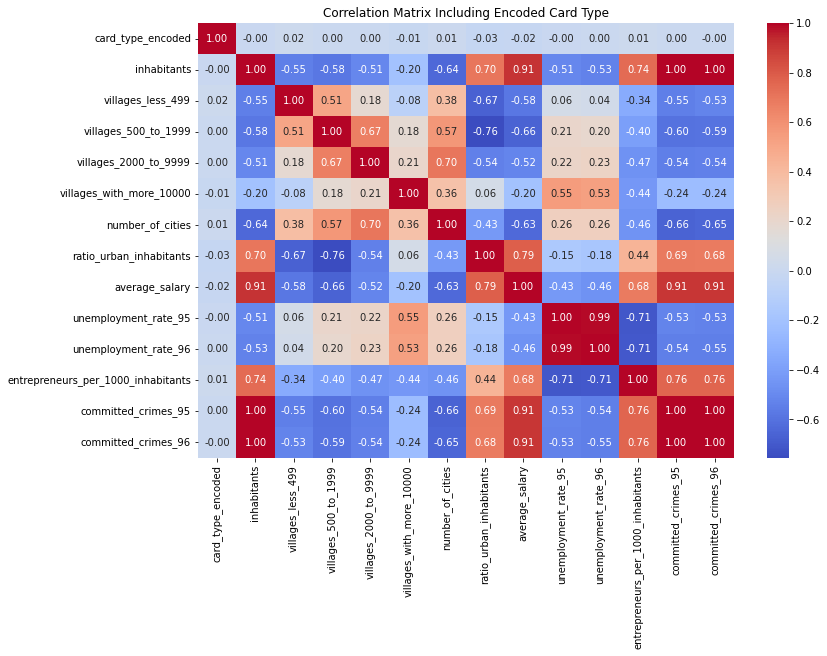

In [330]:
# What correlates with the card type?

# Encoding the column card_type
card_client_district_disp['card_type_encoded'] = card_client_district_disp['card_type'].astype('category').cat.codes

columns = ['card_type_encoded', 'inhabitants', 'villages_less_499', 'villages_500_to_1999', 
           'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities', 
           'ratio_urban_inhabitants', 'average_salary', 'unemployment_rate_95', 
           'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants', 
           'committed_crimes_95', 'committed_crimes_96']

# Plot
correlation_matrix = card_client_district_disp[columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Including Encoded Card Type")
plt.show()

In [331]:
# Combining card, disp, client and trans
card_disp = card.merge(disp, on='disp_id', how='inner')
card_client = card_disp.merge(client, on='client_id', how='inner')
card_client_disp_trans = card_client.merge(trans, on='account_id', how='inner')
print(card_client_disp_trans.head())

   card_id  disp_id   type_x     issued  client_id  account_id type_y  \
0     1005     9285  classic 1993-11-07       9593        7753  OWNER   
1     1005     9285  classic 1993-11-07       9593        7753  OWNER   
2     1005     9285  classic 1993-11-07       9593        7753  OWNER   
3     1005     9285  classic 1993-11-07       9593        7753  OWNER   
4     1005     9285  classic 1993-11-07       9593        7753  OWNER   

   district_id  gender  birth_day  ...  birth_year  trans_id       date  \
0           74  female 1968-01-28  ...        1968   2349697 1993-02-08   
1           74  female 1968-01-28  ...        1968   2349709 1993-02-12   
2           74  female 1968-01-28  ...        1968   2349705 1993-02-12   
3           74  female 1968-01-28  ...        1968   3492040 1993-02-28   
4           74  female 1968-01-28  ...        1968   2350078 1993-03-10   

         type        operation   amount  balance   transaction_type bank  \
0      credit   credit_in_cash    

In [332]:
# Renaming the columns type_x and type_y 
card_client_disp_trans = card_client_disp_trans.rename(columns={
    'type_x': 'card_type',
    'type_y': 'disp_type'
})

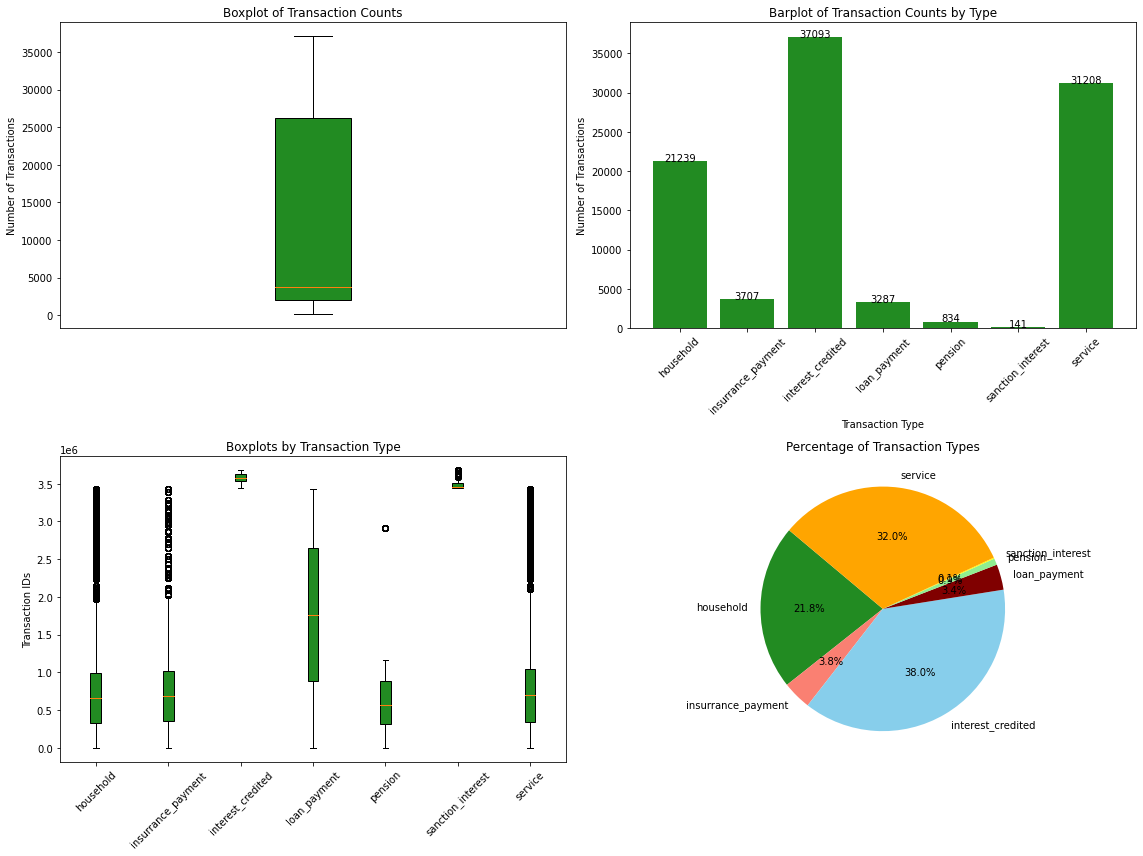

In [333]:
# How many transactions do the clients who own a creditcard have in average?
transaction_counts = card_client_disp_trans.groupby('transaction_type')['trans_id'].count().reset_index(name='transaction_count')

# Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='white')
axes[0, 0].boxplot(transaction_counts['transaction_count'], patch_artist=True, boxprops=dict(facecolor='forestgreen', color='black'))
axes[0, 0].set_title("Boxplot of Transaction Counts")
axes[0, 0].set_ylabel("Number of Transactions")
axes[0, 0].set_xticks([])  # Entfernt die x-Achsenbeschriftung im Boxplot
bars = axes[0, 1].bar(transaction_counts['transaction_type'], transaction_counts['transaction_count'], color='forestgreen')
axes[0, 1].set_title("Barplot of Transaction Counts by Type")
axes[0, 1].set_xlabel("Transaction Type")
axes[0, 1].set_ylabel("Number of Transactions")
axes[0, 1].tick_params(axis='x', rotation=45)  # Rotiert die x-Achsenbeschriftungen, falls nötig

for bar in bars:
    axes[0, 1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                    str(bar.get_height()), ha='center', fontsize=10)
for idx, transaction_type in enumerate(transaction_counts['transaction_type']):
    subset = trans[trans['transaction_type'] == transaction_type]
    axes[1, 0].boxplot(subset['trans_id'], positions=[idx], patch_artist=True, 
                        boxprops=dict(facecolor='forestgreen', color='black'))
axes[1, 0].set_title("Boxplots by Transaction Type")
axes[1, 0].set_xticks(range(len(transaction_counts['transaction_type'])))
axes[1, 0].set_xticklabels(transaction_counts['transaction_type'], rotation=45)
axes[1, 0].set_ylabel("Transaction IDs")
axes[1, 1].pie(
    transaction_counts['transaction_count'],
    labels=transaction_counts['transaction_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['forestgreen', 'salmon', 'skyblue', 'maroon', 'lightgreen', 'yellow', 'orange'] * len(transaction_counts)
)
axes[1, 1].set_title("Percentage of Transaction Types")

plt.tight_layout()
plt.show()

In [334]:
# Korreliert type (von CARD) mit frequency oder transaction?

## 2. Combining information on customers and banking services
We combine the data from the six CSVs with eachother to see how they are being used. In the dataset disp.csv we have disp_id and client_id and account_id so we can combine the client to an account and also see if he's an owner or disponent. 

Remember: The goal of this Challenge is to generate customer lists for a personalised credit card advertising campaign without junior cards. 

In [335]:
# Zuerst kombiniere ich account mit district, dann entferne ich alle Spalten ausser account_id, frequency, date und district_name
account_district = account.merge(district, on='district_id', how='inner')
account_district = account_district[['account_id', 'frequency', 'date', 'district_name']]

In [336]:
print(district.columns)

Index(['district_id', 'district_name', 'region', 'inhabitants',
       'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999',
       'villages_with_more_10000', 'number_of_cities',
       'ratio_urban_inhabitants', 'average_salary', 'unemployment_rate_95',
       'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants',
       'committed_crimes_95', 'committed_crimes_96'],
      dtype='object')


In [337]:
# Renaming the column names so we won't have date_x as column names
disp = disp.rename(columns={'type': 'disp_type'})
card = card.rename(columns={'type': 'card_type'})
trans = trans.rename(columns={'type': 'trans_type'})
trans = trans.rename(columns={'date': 'trans_date'})
loan = loan.rename(columns={'date': 'loan_date'})
loan = loan.rename(columns={'amount': 'loan_amount'})
trans = trans.rename(columns={'amount': 'trans_amount'})
account = account.rename(columns={'date': 'auto_trans_date'})

In [338]:
# Dann kombiniere ich account, client, trans, card, disp, order und loan. 
card_disp = card.merge(disp, on='disp_id', how='inner')
card_disp_client = card_disp.merge(client, on='client_id', how='inner')
account_district_card_disp_client = account_district.merge(card_disp_client, on='account_id', how='inner')
account_district_card_disp_client_trans = account_district_card_disp_client.merge(trans, on='account_id', how='inner')
account_district_card_disp_client_trans_order = account_district_card_disp_client_trans.merge(order, on='account_id', how='inner')
data_combined = account_district_card_disp_client_trans_order.merge(loan, on='account_id', how='inner')
print(data_combined.head())

   account_id frequency       date  district_name  card_id  disp_id card_type  \
0        5215   monthly 1993-07-01  Brno - venkov      834     6301   classic   
1        5215   monthly 1993-07-01  Brno - venkov      834     6301   classic   
2        5215   monthly 1993-07-01  Brno - venkov      834     6301   classic   
3        5215   monthly 1993-07-01  Brno - venkov      834     6301   classic   
4        5215   monthly 1993-07-01  Brno - venkov      834     6301   classic   

      issued  client_id disp_type  ...  bank_to account_to  amount  \
0 1998-08-21       6301     OWNER  ...       KL   58698618     2.0   
1 1998-08-21       6301     OWNER  ...       QR   81640040  5315.0   
2 1998-08-21       6301     OWNER  ...       KL    3664792   372.0   
3 1998-08-21       6301     OWNER  ...       QR   71636765   870.0   
4 1998-08-21       6301     OWNER  ...       KL   79302054  1219.0   

        payment_type  loan_id  loan_date loan_amount duration payments  \
0          househo

In [339]:
print(data_combined.columns)

Index(['account_id', 'frequency', 'date', 'district_name', 'card_id',
       'disp_id', 'card_type', 'issued', 'client_id', 'disp_type',
       'district_id', 'gender', 'birth_day', 'age', 'birth_year', 'trans_id',
       'trans_date', 'trans_type', 'operation', 'trans_amount', 'balance',
       'transaction_type', 'bank', 'account', 'order_id', 'bank_to',
       'account_to', 'amount', 'payment_type', 'loan_id', 'loan_date',
       'loan_amount', 'duration', 'payments', 'status'],
      dtype='object')


## 3. Data Cleaning
Here we "clean" the data which means we decide, what data we will use for the models. 


Pomysł: nie usuwamy junior card, ale trenujemy model, który je przewiduje. następnie uruchamiamy go i sprawdzamy, czy otrzymujemy tych samych klientów, co z innymi typami kart. przyglądamy się również loan, ponieważ chcemy dawać kartę kredytową tylko zaufanym klientom. 

In [340]:
# See if there is any missing data
print(data_combined.isnull().sum())

account_id              0
frequency            3062
date                    0
district_name           0
card_id                 0
disp_id                 0
card_type               0
issued                  0
client_id               0
disp_type               0
district_id             0
gender                  0
birth_day               0
age                     0
birth_year              0
trans_id                0
trans_date              0
trans_type           3557
operation           15089
trans_amount            0
balance                 0
transaction_type    58042
bank                72673
account             65087
order_id                0
bank_to                 0
account_to              0
amount                  0
payment_type        20925
loan_id                 0
loan_date               0
loan_amount             0
duration                0
payments                0
status                  0
dtype: int64


## 4. Identify existing credit card purchasers, including determining the purchase date and roll-up window.

In [341]:
# Creating dataframe with clients who have a credit card (without junior and NA)
card_users = data_combined[(data_combined['card_type'] != 'junior') & (data_combined['card_type'].notna())]

In [ ]:
# Determine eligible clients. We choose the ones who have a credit card, are using it and have no problems with loans
# Gruppieren nach client_id und dann diejenigen entfernen, die bei trans_date nichts haben
# 


In [ ]:
# Use issued

In [345]:
# Determine clients’ characteristics before product purchase

## 5. Determine the non-buyers for comparison (incl. roll-up window).

In [342]:
# Creating dataframe with clients who have a junior card
junior_card = data_combined[(data_combined['card_type'] == 'junior')]

In [ ]:
# Creating dataframe with clients who don't have a card
no_card = data_combined[(data_combined['card_type'].isna())]

In [343]:
# Creating dataframe with clients who have either a junior card or no card 
no_and_junior_card = data_combined[(data_combined['card_type'] == 'junior') & (data_combined['card_type'].isna())]

## 6. Generate event-related customer information before credit card purchase based on the transaction history (analogue for non-purchasers).